In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading data
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#The describe function below shows that the Total charges is not a float type object
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


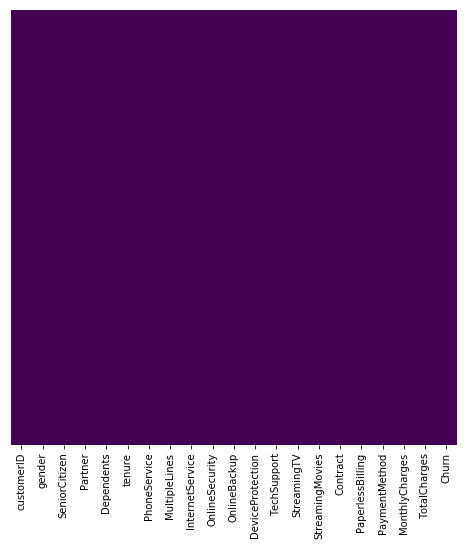

In [6]:
#Through analysis of the excel data, it is found that there 11 empty values for 'TotalCharges'. Filled these with np.nan 
#Converted TotalCharges to float type
data[data['TotalCharges']==data.iloc[488,19]]=np.nan
data['TotalCharges']=data['TotalCharges'].astype(float)
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

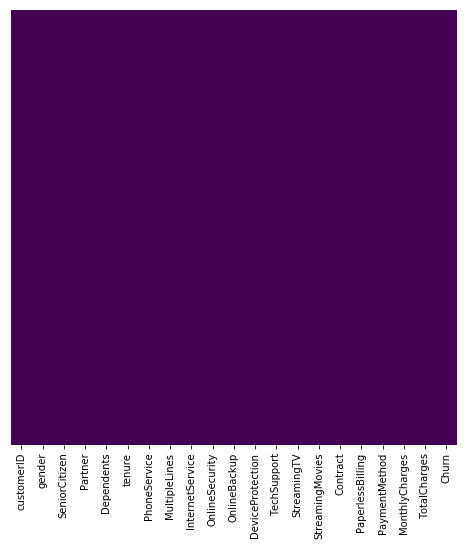

In [7]:
#As the percentage of missing values is 0.15, the missing values are dropped.
data.dropna(inplace=True)
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5,1,'plot showing monthly charges vd churn colored by Payment method')

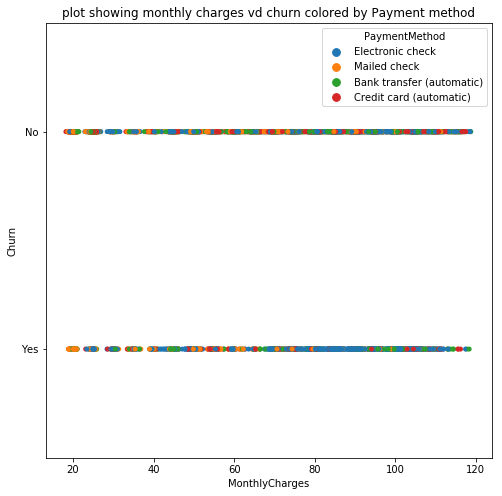

In [8]:
#Plot showing monthly charges vd churn colored by Payment method. Because most of the variables
#are categorical not much inferencecan be made from this plot
plt.figure(figsize=(8,8))
sns.stripplot(x='MonthlyCharges',y='Churn',hue='PaymentMethod',data=data)
plt.title('plot showing monthly charges vd churn colored by Payment method')

In [9]:
#Converting categorical variables to dummy variables
df=pd.get_dummies(data=data, columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines',
                                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                                      'StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
customerID                                 7032 non-null object
SeniorCitizen                              7032 non-null float64
tenure                                     7032 non-null float64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
PaperlessBilling_No                        7032 non-null uint8
Pa

In [10]:
#Dropped one dummy variable for each categorical variable to get rid of dummy trap
#Dropped CustomerID as it is not a predictive variable
df=df.drop(['customerID','gender_Male','Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No',
         'MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service',
         'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
         'StreamingTV_No internet service','StreamingMovies_No internet service','Contract_Month-to-month',
         'PaymentMethod_Mailed check','Churn_No'],axis=1)

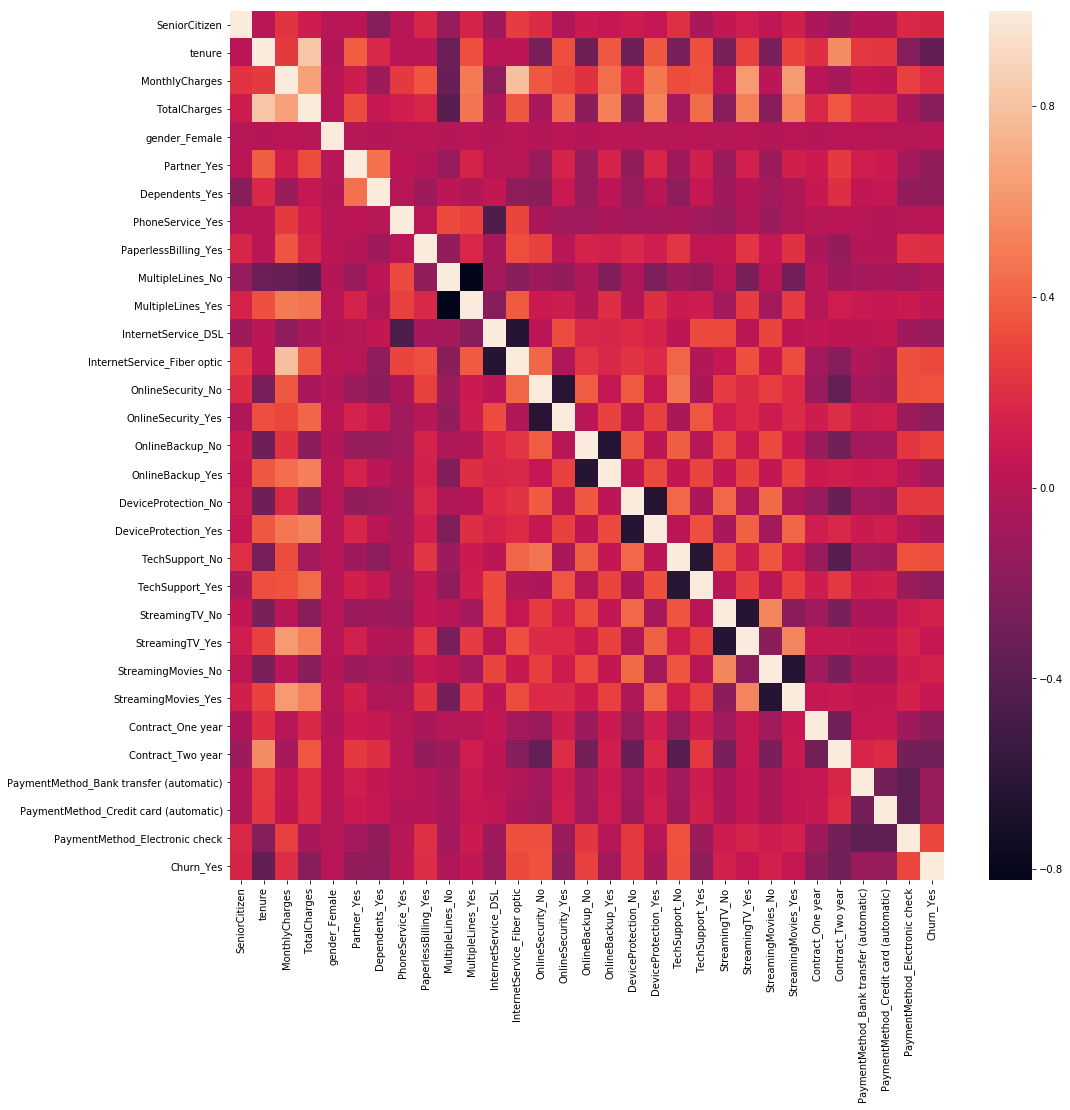

In [11]:
#Heat map showing correlation of the data
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

Text(0.5,1,'Histogram showing distribution of tenure')

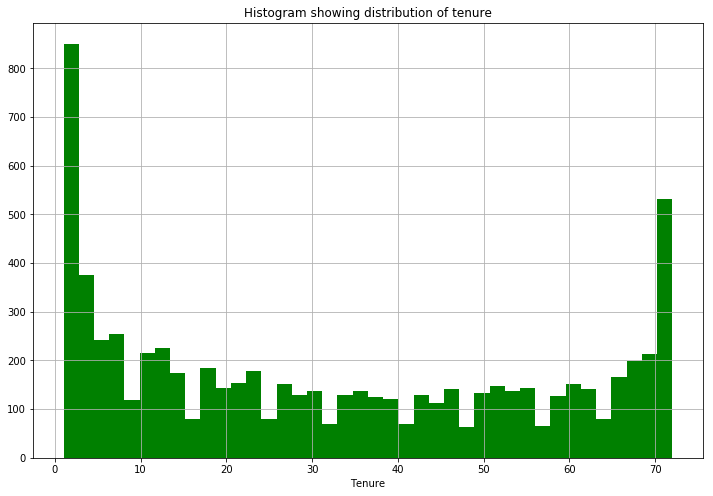

In [12]:
df['tenure'].hist(color='green',bins=40,figsize=(12,8))
plt.xlabel('Tenure')
plt.title('Histogram showing distribution of tenure')

Text(0.5,1,'Histogram showing distribution of MonthlyCharges')

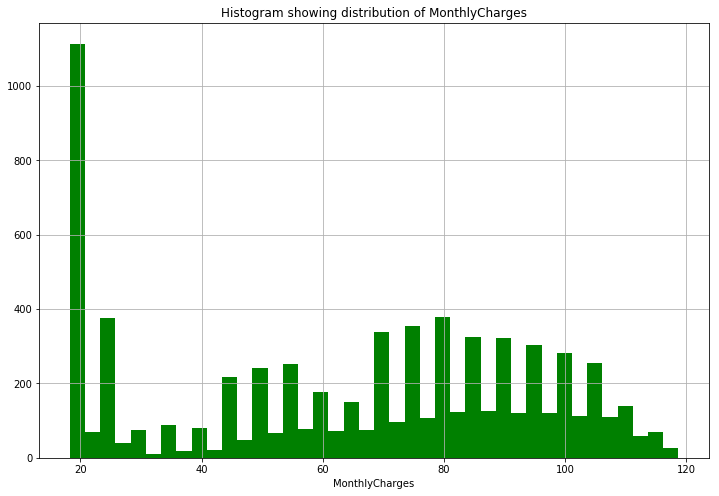

In [13]:
df['MonthlyCharges'].hist(color='green',bins=40,figsize=(12,8))
plt.xlabel('MonthlyCharges')
plt.title('Histogram showing distribution of MonthlyCharges')

Text(0.5,1,'Histogram showing distribution of TotalCharges')

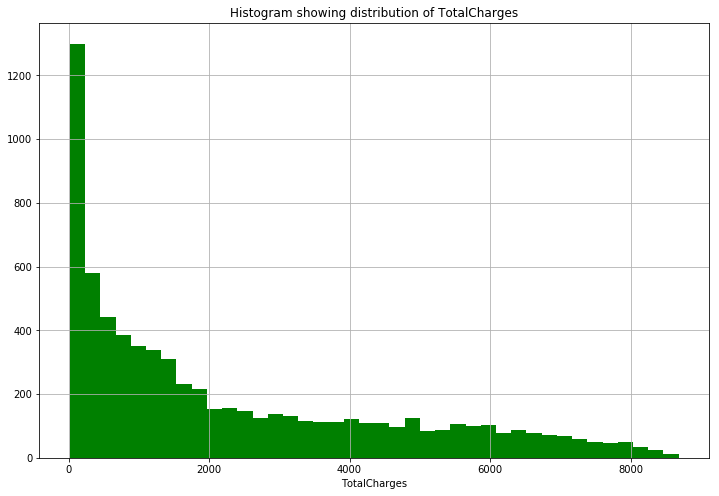

In [14]:
df['TotalCharges'].hist(color='green',bins=40,figsize=(12,8))
plt.xlabel('TotalCharges')
plt.title('Histogram showing distribution of TotalCharges')

Text(0.5,1,'Scatter plot showing distribution of monthlycharges and tenure')

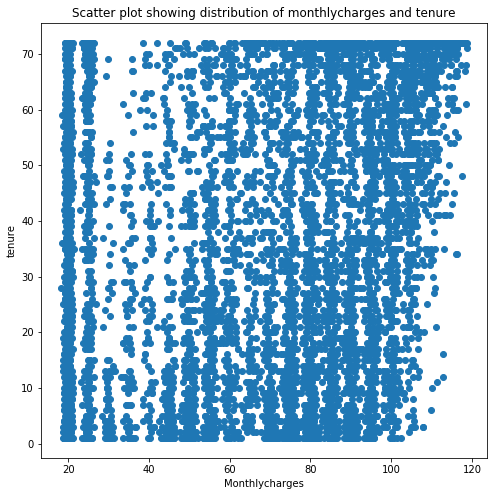

In [15]:
#Scatter plot showing distribution of monthlycharges and tenure. Not much inference as be made as it is uniform.
plt.figure(figsize=(8,8))
plt.scatter(x='MonthlyCharges',y='tenure',data=data)
plt.xlabel('Monthlycharges')
plt.ylabel('tenure')
plt.title('Scatter plot showing distribution of monthlycharges and tenure')

In [16]:
from sklearn.model_selection import train_test_split
X=df.drop(['Churn_Yes'],axis=1)
y=df['Churn_Yes']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=123)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,pred)
score1

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1484
          1       0.74      0.52      0.61       626

avg / total       0.80      0.80      0.79      2110



0.8023696682464455

In [20]:
from  sklearn.model_selection import cross_val_score
score2 = cross_val_score(model, X, y, cv=10)
score2.mean()

0.8036120778719462

In [21]:
coeff_df = pd.DataFrame(np.transpose(model.coef_),X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
SeniorCitizen,0.182027
tenure,-0.079422
MonthlyCharges,0.005333
TotalCharges,0.000467
gender_Female,-0.095126
Partner_Yes,-0.088579
Dependents_Yes,-0.171714
PhoneService_Yes,-0.323636
PaperlessBilling_Yes,0.161875
MultipleLines_No,-0.395014


## Findings
#### Logistic Regression moedl gave an accuracy score of 80.23 and cross validation gave a score of 80.36 meaning the model generalizes good.
